# Libraries

In [1]:
import json
import folium
from pandas.io.json import json_normalize
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
import plotly.express as px
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
pio.renderers.default = "notebook"
import chart_studio.tools as tls
import chart_studio.plotly as py
import chart_studio

In [5]:
import requests
import urllib
import urllib.request
import re
import os
import csv
import smtplib
import os.path
from bs4 import BeautifulSoup
import csv
import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
import tabula
import PyPDF2
from datetime import timedelta, date

In [3]:
import pickle
import os.path
import csv
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import kml2geojson

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn import linear_model
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.cluster import KMeans
import matplotlib.colors as colors
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Airbnb

In [103]:
bnb = pd.read_csv(r'C:\Users\Wan Xin\Documents\NUS\Information Visualization\Project\Data\listings.csv',
                  engine='python', encoding='ISO-8859-1')

In [104]:
bnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20191126102104,43795,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,NaN,NaN,...,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20191126102104,43795,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,...,f,f,moderate,f,t,1,0,1,0,0.26
2,56334,https://www.airbnb.com/rooms/56334,20191126102104,43795,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,NaN,NaN,...,f,f,flexible,t,t,2,0,2,0,0.19
3,71609,https://www.airbnb.com/rooms/71609,20191126102104,43795,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,Landed Homestay Room for Rental. Between Simei...,For 3 (Website hidden by Airbnb) room 1&2 and ...,NaN,Incase there is some changes in the rooms allo...,...,t,f,moderate,f,t,8,0,8,0,0.16
4,71896,https://www.airbnb.com/rooms/71896,20191126102104,43795,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,Vocational Stay Deluxe Bedroom in Singapore.(N...,NaN,Incase there is some changes in the rooms allo...,...,t,f,moderate,f,t,8,0,8,0,0.24


In [7]:
bnb['price_per_person'] = [None]*len(bnb)
for i in range(len(bnb)):
    bnb['price_per_person'][i] = float(bnb['price'][i]/bnb['accommodates'][i]) 
bnb['price_per_person'] = pd.to_numeric(bnb['price_per_person'], errors='coerce')

C:\Users\Wan Xin\AppData\Local\ESRI\conda\envs\ge5219\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
features = ['cancellation_policy', 'is_location_exact', 'accommodates', 'reviews_per_month', 'property_type', 'price',
            'host_total_listings_count', 'extra_people', 'calculated_host_listings_count', 'guests_included',
            'review_scores_rating', 'host_response_time', 'number_of_reviews', 'host_is_superhost', 'room_type',
            'instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'security_deposit',
            'host_listings_count' , 'neighbourhood_cleansed',
            'minimum_nights', 'bathrooms', 'require_guest_phone_verification', 'cleaning_fee']

In [106]:
bnb_cleaned = bnb[features]

In [107]:
num_cols = bnb_cleaned.select_dtypes(exclude='object').columns
cat_cols = bnb_cleaned.select_dtypes(include='object').columns
bnb_cleaned[cat_cols] = bnb_cleaned[cat_cols].apply(
    lambda col: col.fillna(col.mode()[0]))
bnb_cleaned[num_cols] = bnb_cleaned[num_cols].apply(
    lambda col: col.fillna(col.median()))

C:\Users\Wan Xin\AppData\Local\ESRI\conda\envs\ge5219\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



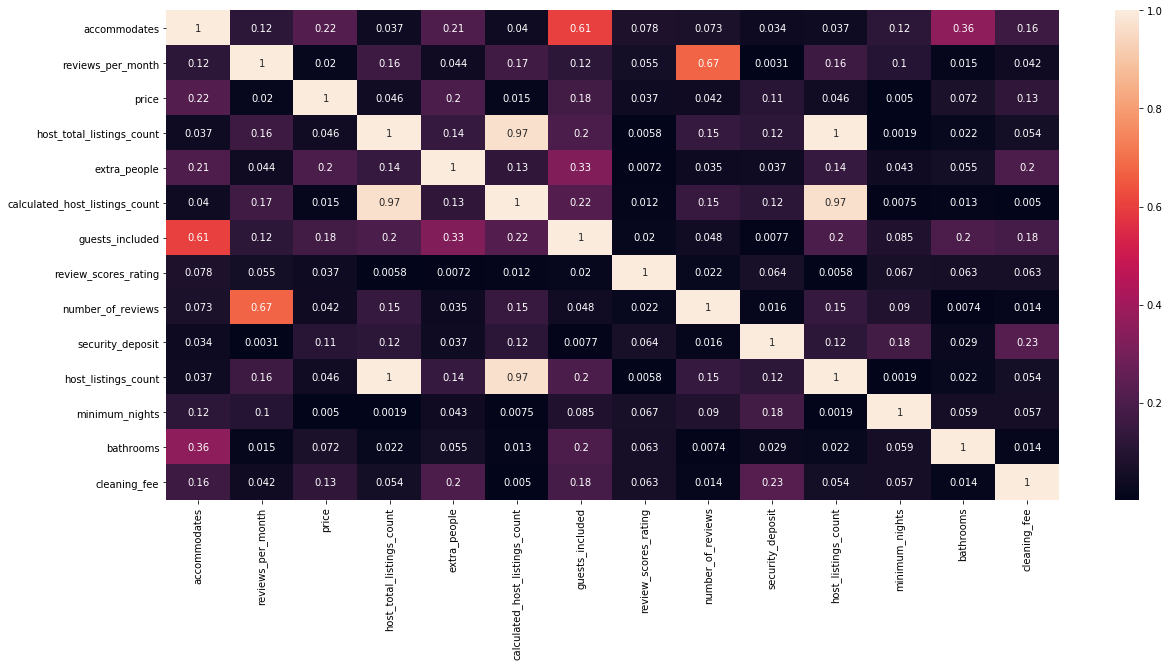

In [108]:
corr_matrix = bnb_cleaned.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
sns_plot = sns.heatmap(corr_matrix,annot=True)

figure = sns_plot.get_figure()    
#figure.savefig('svm_conf.png', dpi=400)
figure.savefig(r"C:\Users\Wan Xin\Documents\IBM coursera\Capstone\heatmap.png")

In [109]:
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
accommodates                      0.216972
extra_people                      0.197937
guests_included                   0.180531
cleaning_fee                      0.129200
security_deposit                  0.110909
bathrooms                         0.072492
host_listings_count               0.045709
host_total_listings_count         0.045709
number_of_reviews                 0.041662
review_scores_rating              0.037190
reviews_per_month                 0.019514
calculated_host_listings_count    0.014922
minimum_nights                    0.005000
Name: price, dtype: float64

In [134]:
def transform_data(df, num_cols, cat_cols):
    transformed_df = df.copy()

    for col in cat_cols:
        transformed_df[col] = transformed_df[col].astype('category')
        transformed_df = pd.concat([transformed_df.drop(
            col, axis=1), pd.get_dummies(transformed_df[col], prefix=col)], axis=1)
    transformed_df[num_cols] = transformed_df[num_cols].apply(
        lambda x: np.log(x+1))

    num_cols = num_cols.drop(['price'])
    scaler = MinMaxScaler()
    transformed_df[num_cols] = scaler.fit_transform(transformed_df[num_cols])

    return transformed_df
transformed_df = transform_data(bnb_cleaned, num_cols, cat_cols)

In [135]:
transformed_df.head()

,accommodates,reviews_per_month,price,host_total_listings_count,extra_people,calculated_host_listings_count,guests_included,review_scores_rating,number_of_reviews,security_deposit,...,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0.000000,0.000000,4.418841,0.186122,0.451049,0.080550,0.000000,0.961006,0.118559,0.568315,...,0,0,0,0,0,0,1,0,0,1
1,0.189464,0.077869,4.406719,0.117430,0.507092,0.000000,0.189464,0.940576,0.503629,0.568315,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,0.057744,4.234107,0.186122,0.451049,0.080550,0.000000,0.987266,0.520748,0.568315,...,0,0,0,0,0,0,1,0,0,1
3,0.585385,0.048754,5.313206,0.372245,0.555008,0.298802,0.428160,0.890189,0.474235,0.635807,...,0,1,0,0,0,0,0,0,0,1
4,0.323891,0.072235,4.543295,0.372245,0.507092,0.298802,0.000000,0.882654,0.550570,0.557294,...,0,1,0,0,0,0,0,0,0,1


In [186]:
def train_and_test(df, model, test_size=0.2):
    target = transformed_df['price']
    features = transformed_df.copy().drop('price', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=32)

    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))
    pred = np.round(np.exp(y_pred) + 1, 1)
    actual = np.round(np.exp(y_test) + 1, 1)   
    reg = sns.regplot(x=actual.values, y=pred,fit_reg=False)
    #reg.set(xlim=(0, 1200))
    #reg.set(ylim=(0, 1200))
    plt.title('Predicted vs. Actual Price', fontsize=18, fontweight='bold')
    plt.xlabel('Actual Listing Price')
    plt.ylabel('Predicted Listing Price')

    return model

R^2 test: 0.755


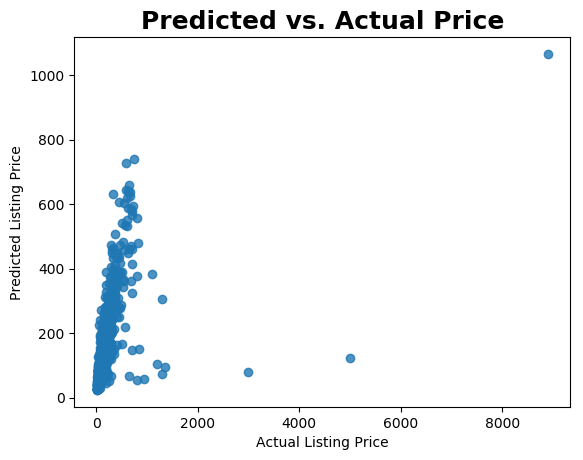

In [187]:
model = LGBMRegressor()
trained_model = train_and_test(transformed_df, model)

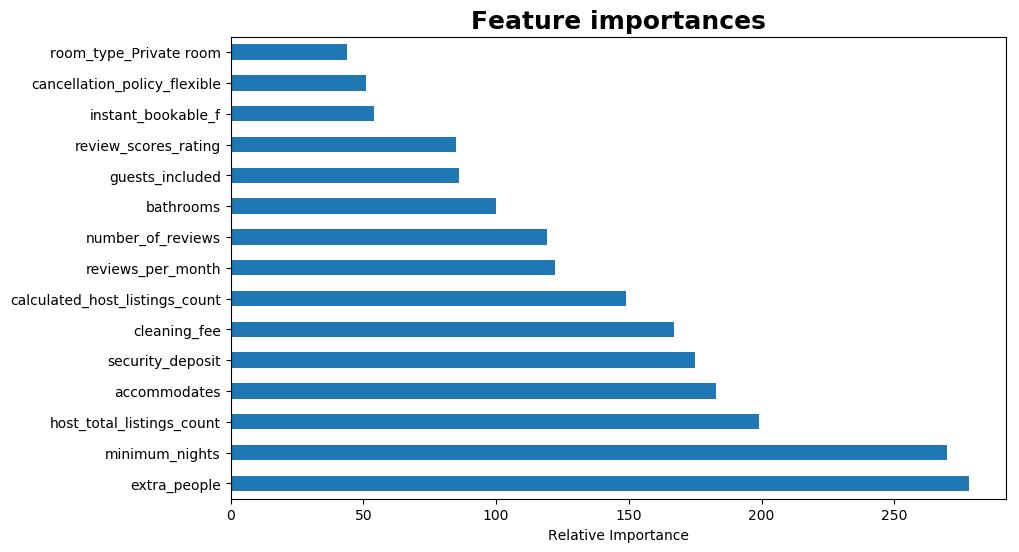

In [188]:
feat_imp = pd.Series(trained_model.feature_importances_,
                     index=transformed_df.columns.drop('price'))
feat_imp.nlargest(15).plot(kind='barh', figsize=(10, 6))
plt.xlabel('Relative Importance')
plt.title("Feature importances", fontsize=18, fontweight='bold')
plt.show()